In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
kpop_idol = pd.read_csv(r'C:\Users\zdene\OneDrive\Plocha\CSV files\Kpop idol analysis\kpop_idols_cleaned.csv', index_col=0)

In [5]:
print(kpop_idol.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 0 to 1856
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stage Name     1856 non-null   object
 1   Full Name      1846 non-null   object
 2   Date of Birth  1856 non-null   object
 3   Group          1704 non-null   object
 4   Country        1856 non-null   object
 5   Height         1856 non-null   int64 
 6   Weight         1856 non-null   int64 
 7   Gender         1856 non-null   object
 8   Year of Birth  1856 non-null   int64 
 9   Age            1856 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 159.5+ KB
None


Creating tables (Gender/Body proportions)

In [6]:
kpop_male = kpop_idol[kpop_idol['Gender'] == 'M']
kpop_female = kpop_idol[kpop_idol['Gender'] == 'F']

Dropping missing values (Height/Weight)

In [7]:
kpop_proportions = kpop_idol[(kpop_idol['Weight'] > 0 ) & (kpop_idol['Height'] > 0)]
kpop_male_proportions = kpop_proportions[kpop_proportions['Gender'] == 'M']
kpop_female_proportions = kpop_proportions[kpop_proportions['Gender'] == 'F']

print(kpop_proportions.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 1856
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stage Name     581 non-null    object
 1   Full Name      573 non-null    object
 2   Date of Birth  581 non-null    object
 3   Group          541 non-null    object
 4   Country        581 non-null    object
 5   Height         581 non-null    int64 
 6   Weight         581 non-null    int64 
 7   Gender         581 non-null    object
 8   Year of Birth  581 non-null    int64 
 9   Age            581 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 49.9+ KB
None


Exploratory Data Analysis

C:\Users\zdene\AppData\Local\Temp\ipykernel_11700\3325160753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = kpop_proportions.corr(),annot = True)


<Axes: >

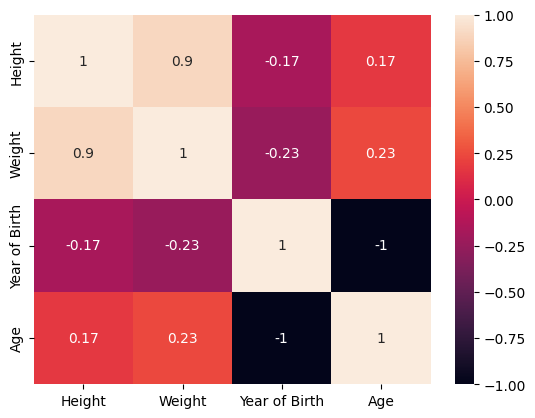

In [8]:
sns.heatmap(data = kpop_proportions.corr(),annot = True)

[Text(0.5, 1.0, 'Weight/Height corr')]

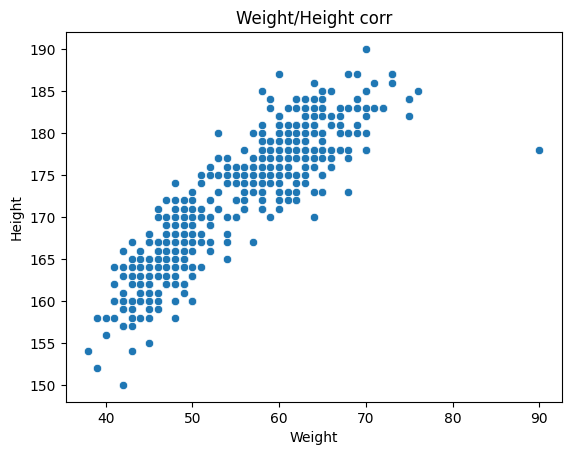

In [9]:
sns.scatterplot(data = kpop_proportions, x = 'Weight', y = 'Height').set(title = 'Weight/Height corr')

# Age

Male age distribution

[Text(0.5, 1.0, 'Male age distribution')]

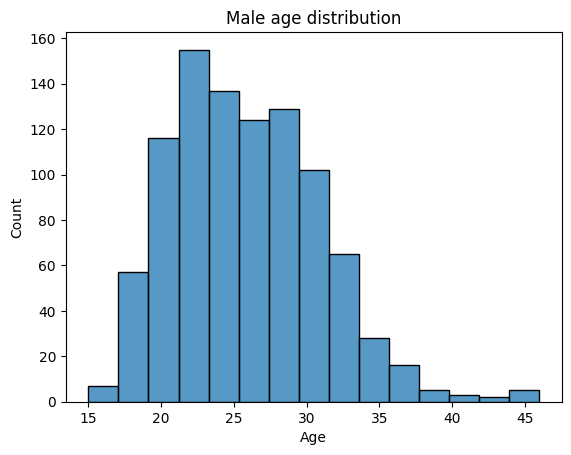

In [10]:
sns.histplot(data = kpop_male, x = 'Age', bins = 15).set(title = 'Male age distribution')

Female age distribution

[Text(0.5, 1.0, 'Female age distribution')]

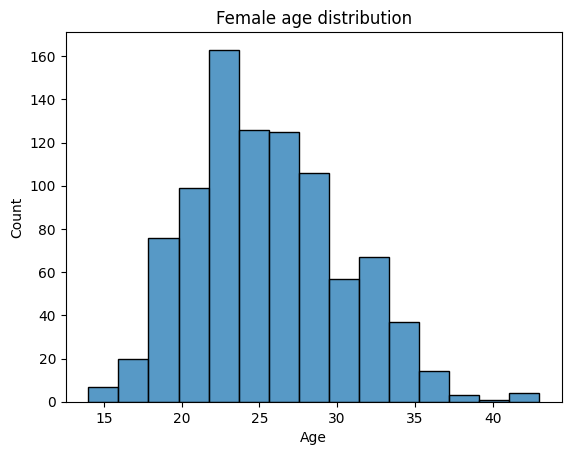

In [11]:
sns.histplot(data = kpop_female, x = 'Age', bins = 15).set(title = 'Female age distribution')

Comparative analysis (Age)

C:\Users\zdene\AppData\Local\Temp\ipykernel_11700\1443645854.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.barplot(data = kpop_idol, x = 'Gender', y = 'Age', ci= None)


[Text(0, 0, '26.0515'), Text(0, 0, '25.4022')]

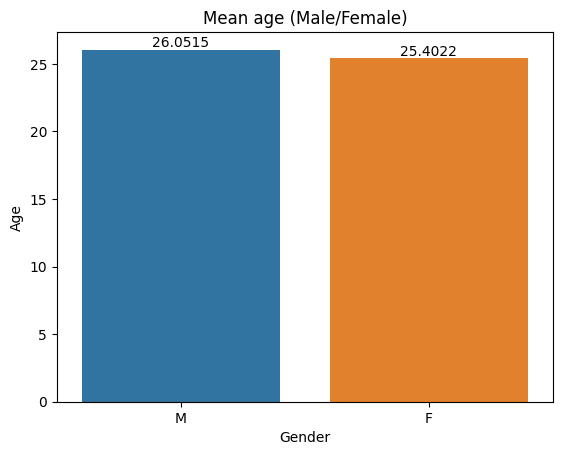

In [12]:
a = sns.barplot(data = kpop_idol, x = 'Gender', y = 'Age', ci= None)
a.set(title = 'Mean age (Male/Female)')
a.bar_label(a.containers[0])

# Height

Male height distribution

<Axes: xlabel='Height', ylabel='Count'>

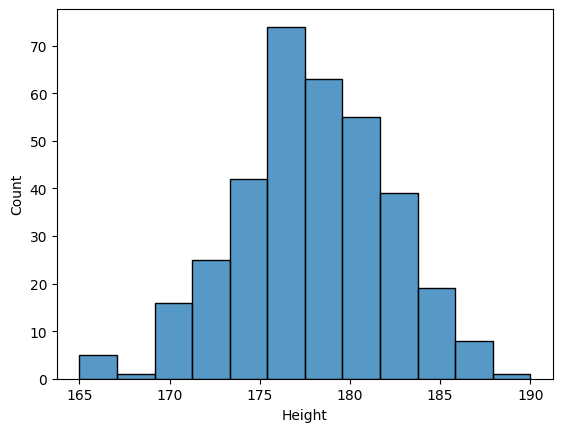

In [13]:
sns.histplot(data = kpop_male_proportions, x = 'Height', bins = 12)

Female height distribution

<Axes: xlabel='Height', ylabel='Count'>

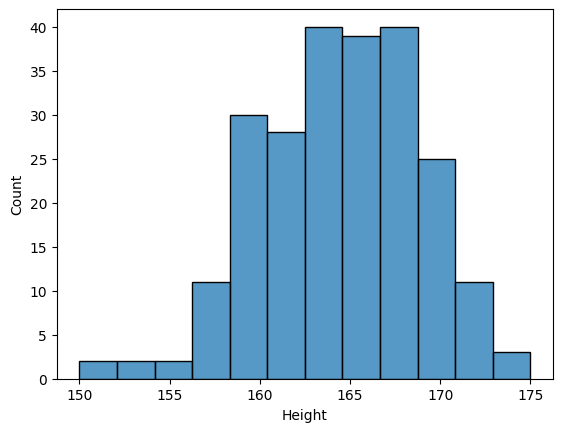

In [14]:
sns.histplot(data = kpop_female_proportions, x = 'Height', bins = 12)

Comparative analysis (Height)

C:\Users\zdene\AppData\Local\Temp\ipykernel_11700\1414867070.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  h = sns.barplot(data = kpop_proportions, x = 'Gender', y = 'Height',ci = None)


[Text(0, 0, '177.871'), Text(0, 0, '164.442')]

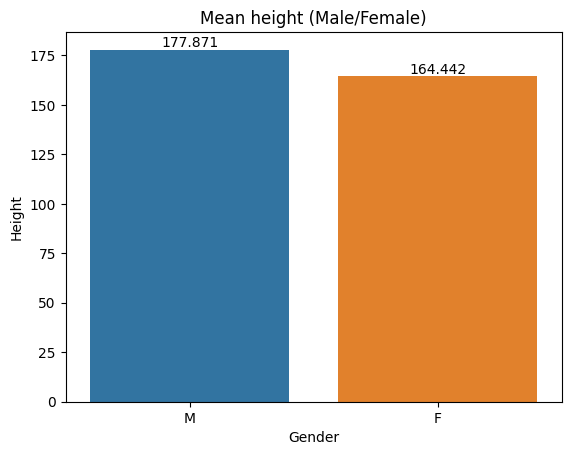

In [15]:
h = sns.barplot(data = kpop_proportions, x = 'Gender', y = 'Height',ci = None)
h.set(title='Mean height (Male/Female)')
h.bar_label(h.containers[0])

# Weight

Male weight distribution

[Text(0.5, 1.0, 'Male weight distribution')]

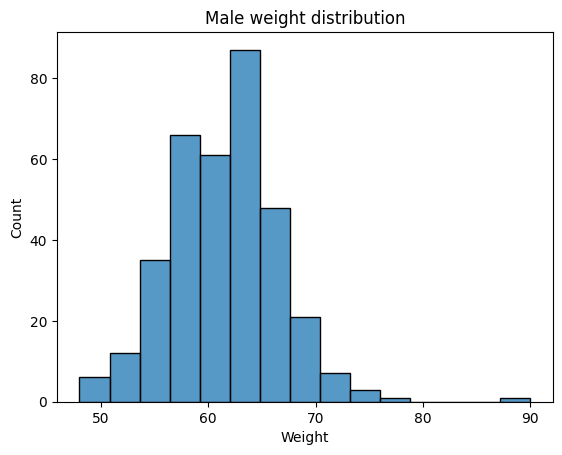

In [16]:
sns.histplot(data = kpop_male_proportions, x = 'Weight', bins = 15).set(title = 'Male weight distribution')

Female weight distribution

[Text(0.5, 1.0, 'Female weight distribution')]

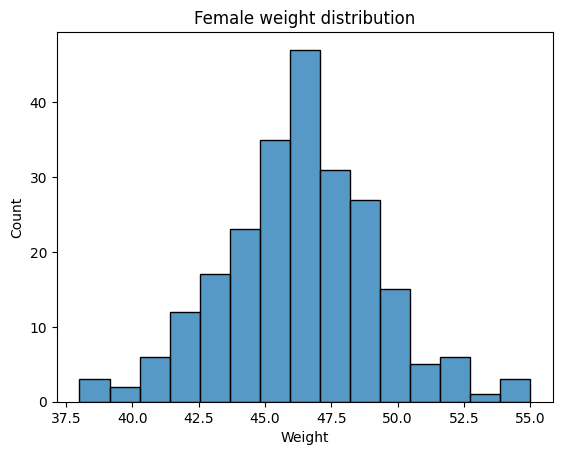

In [17]:
sns.histplot(data = kpop_female_proportions, x = 'Weight', bins = 15).set(title = 'Female weight distribution')

Gender comparative analysis (Weight)

C:\Users\zdene\AppData\Local\Temp\ipykernel_11700\730214319.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  w = sns.barplot(data = kpop_proportions, x = 'Gender', y = 'Weight',ci = None)


[Text(0, 0, '61.3161'), Text(0, 0, '46.3348')]

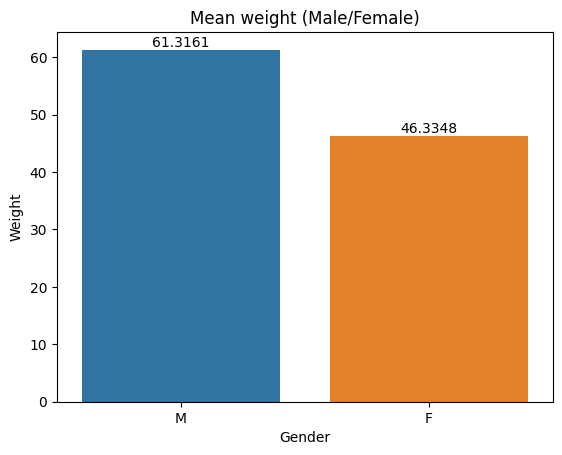

In [18]:
w = sns.barplot(data = kpop_proportions, x = 'Gender', y = 'Weight',ci = None)
w.set(title='Mean weight (Male/Female)')
w.bar_label(w.containers[0])

# Nationality

Country distribution

Country
South Korea    1667
Japan            64
China            48
USA              19
Thailand         14
Taiwan            9
Canada            7
Hong Kong         7
Australia         4
Indonesia         3
Name: Stage Name, dtype: int64


<Axes: ylabel='Country'>

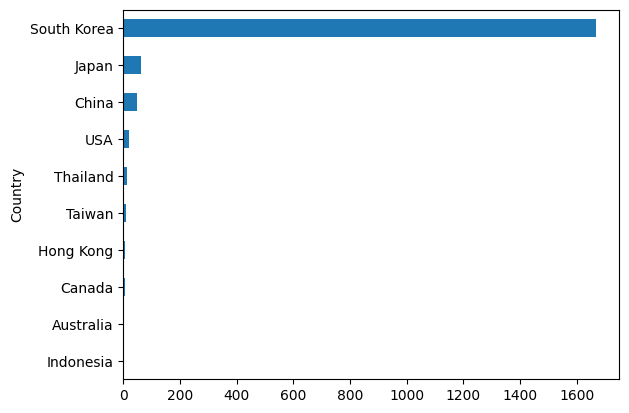

In [35]:
nationality = kpop_idol.groupby('Country')['Stage Name'].count().sort_values(ascending= False)
print(nationality.head(10))

nationality.head(10).sort_values(ascending=True).plot(kind='barh')

Country distribution excluding South Korea

Country
Japan          64
China          48
USA            19
Thailand       14
Taiwan          9
Canada          7
Hong Kong       7
Australia       4
Indonesia       3
Philippines     2
Name: Stage Name, dtype: int64


<Axes: ylabel='Country'>

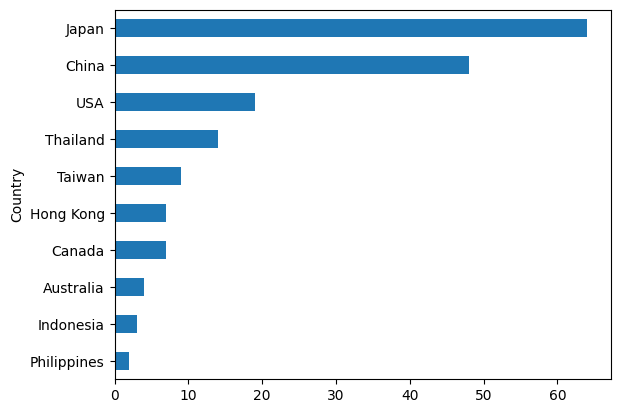

In [39]:

nationality = kpop_idol[kpop_idol['Country'] != 'South Korea'].groupby('Country')['Stage Name'].count().sort_values(ascending= False)
print(nationality.head(10))

nationality.head(10).sort_values(ascending=True).plot(kind='barh')